In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array([ [0], [1], [1], [0] ])

In [42]:
class NeuralNetwork():

    def __init__(self) -> None:
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outputLayerNeurons = 1
        self.learning_rate = 0.2
        self.W_hi = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_oh = np.random.randn(hiddenLayerNeurons, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x*(1-x)
        
        else :
            return 1/1+np.exp(-x)
    
    def feedForward(self, X):
        hidden_input = X.dot(self.W_hi)
        self.hidden_output = self.sigmoid(hidden_input)

        output_input = np.dot(self.hidden_output, self.W_oh)
        pred = self.sigmoid(output_input)
        return pred 
    
    def backPropagtion(self, X,Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, True)

        hidden_error = output_delta.dot(self.W_oh.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)
        
        self.W_hi += X.T.dot(hidden_delta)
        self.W_oh += self.hidden_output.T.dot(output_delta)

    def fit(self, X, Y):
        output = self.feedForward(X)
        self.backPropagtion(X,Y, output)

In [43]:
NN = NeuralNetwork()
error = []

for i in range(10000):
    NN.fit(X,Y)
    error.append(np.mean(np.square(Y-NN.feedForward(X))))

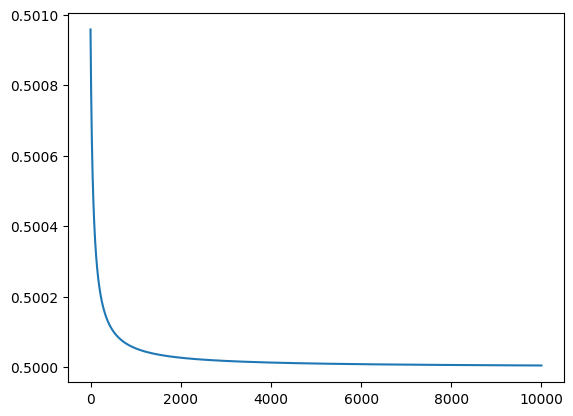

In [44]:
plt.plot(error)
plt.show()

In [45]:
value = np.array([0,0])

NN.feedForward(value)

array([1.0000033])

In [46]:
value = np.array([1,0])

NN.feedForward(value)

array([1.00000026])

In [47]:
value = np.array([1,1])

NN.feedForward(value)

array([1.00000746])